# Trajectory generation like Simotion

Input to the **MC_MOVE** block:

* Position
* Velocity
* Acceleration
* Deaccelration
* Jerk

## Constant acceleration

$$
v(t) = \int_0^t a(\tau) d\tau = \int_0^t a \, d\tau = \bigg[ a\,t \bigg]_0^t = a\,t
$$

$$
p(t) = \int_0^t v(\tau) d\tau = \int_0^t a\,\tau d\tau = \frac{1}{2} a \, t^2
$$

$$
t_{acc}= \frac{a}{v_{max}}
$$


t_acc 2.0


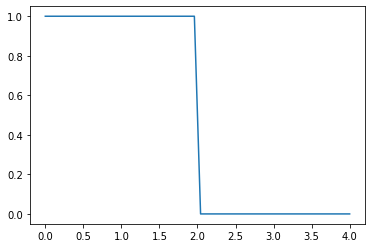

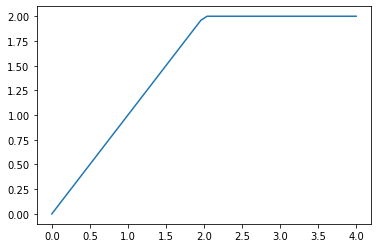

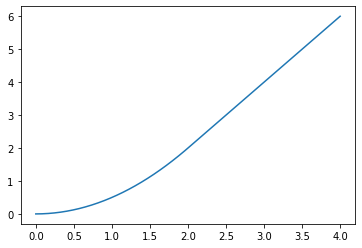

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

acc = 1
v_max = 2

t = np.linspace(0,4)

t_acc = v_max/acc

print("t_acc", t_acc)

a = []
v = []
p = []

for ti in t:

    if ti <= t_acc:
        a.append(acc)
        v.append(ti*acc)
        p.append(1/2*ti**2*acc)
    else:
        a.append(0)
        v.append(v_max)
        p.append(1/2*t_acc**2*acc + v_max*(ti - t_acc))
    

plt.plot(t,a)
plt.figure()
plt.plot(t,v)
plt.figure()
plt.plot(t,p)
plt.show()

## Constant jerk

If $t<\frac{t_{acc}}{2}$
$$
a(t) = t \, j_{max} 
$$
elseif $t<t_{acc}$
$$
a(t) = j_{max} \, \frac{t_{acc}}{2} - j_{max} (t - \frac{t_{acc}}{2})
$$
else
$$
a(t) = 0
$$

$$
a_{max} = \frac{j_{max} \, t_{acc}}{2}
$$

$$
t_{acc} = 2\frac{j_{max}}{a_{max}}
$$





If $t<\frac{t_{acc}}{2}$
$$
v(t) = \frac{1}{2} t^2 \, j_{max} 
$$
elseif $t<t_{acc}$
$$
v(t) = \frac{1}{2} (\frac{t_{acc}}{2})^2 \, j_{max} + a_{max} - \frac{1}{2} (t - t_{acc})^2 \, j_{max} 
$$
else
$$
v(t) = v_{max}
$$


t1 1.25
t2 2.0
t3 3.25


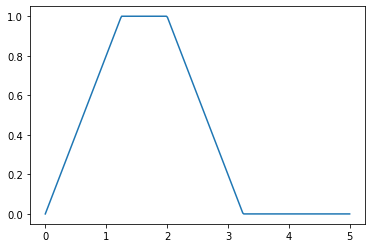

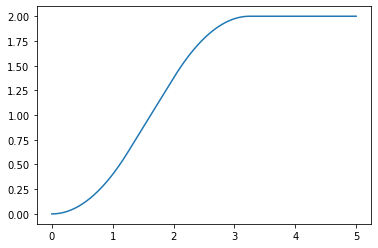

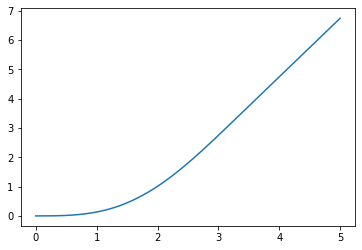

In [6]:

j_max = 0.8

t = np.linspace(0,5,300)

t1 = acc/j_max
t2 = t1 + 1/acc*(v_max - acc**2/j_max)
t3 = t1 + t2 

print("t1", t1)
print("t2", t2)
print("t3", t3)

a = []
v = []
p = []

for ti in t:

    if ti <= t1:
        a.append(j_max*ti)
        v.append(j_max*1/2*ti**2)
        p.append(j_max*1/6*ti**3)
    elif ti <= t2:
        a.append(j_max*t1)

        v_glenn = j_max*1/2 * (t1)**2  + acc*(ti-t1)
        v.append(v_glenn)

        p_glenn = j_max * 1/6 * t1**3 + (j_max*1/2 * (t1)**2)*(ti-t1)  + 1/2*acc*(ti-t1)**2
        p.append(p_glenn)
    elif ti <= t3:
        a.append(j_max*t1 - j_max*(ti - t2))
        v_glenn = 1/2 * (t1)**2*j_max  + acc*(t2-t1) + acc*(ti - t2) - 1/2*j_max*(ti - t2)**2
        v.append(v_glenn)

        p_glenn = j_max * 1/6 * t1**3 + (j_max*1/2 * (t1)**2)*(t2-t1)  + 1/2*acc*(t2-t1)**2
        p_glenn += (1/2 * (t1)**2*j_max  + acc*(t2-t1))*(ti-t2) + 1/2*acc*(ti - t2)**2 - 1/6*j_max*(ti - t2)**3

        p.append(p_glenn)
    else:
        a.append(0)
        v.append(v_max)


        p_glenn = j_max * 1/6 * t1**3 + (j_max*1/2 * (t1)**2)*(t2-t1)  + 1/2*acc*(t2-t1)**2
        p_glenn += (1/2 * (t1)**2*j_max  + acc*(t2-t1))*(t3-t2) + 1/2*acc*(t3 - t2)**2 - 1/6*j_max*(t3 - t2)**3
        p_glenn +=  v_max * (ti - t3)

        p.append(p_glenn)
    

plt.plot(t,a)
plt.figure()
plt.plot(t,v)
plt.figure()
plt.plot(t,p)

plt.show()


